In [1]:
import pandas as pd
import psycopg2

In [2]:
POSTGRES_USERNAME = "root"
POSTGRES_PASSWORD = "A3Z2RmYeFKaaxFZ0dv8b"
POSTGRES_HOSTNAME = "db-final-project.ctiwygyojfe8.us-east-1.rds.amazonaws.com"
POSTGRES_PORT = "5432"
POSTGRES_DBNAME = "postgres"

In [3]:
conn = psycopg2.connect(
    host=POSTGRES_HOSTNAME,
    port=POSTGRES_PORT,
    dbname=POSTGRES_DBNAME,
    user=POSTGRES_USERNAME,
    password=POSTGRES_PASSWORD
)

In [4]:
query = '''SELECT * 

FROM darwin
WHERE planned_time_arrival IS NOT NULL AND planned_time_departure IS NOT NULL'''

In [5]:
df = pd.read_sql_query(query, conn)

/var/folders/j1/p24gk4zn09l83n0_hh3m02gc0000gn/T/ipykernel_3880/1553155693.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [6]:
df

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,platform,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,source_instance,estimated_time_minutes
0,202308167195848,G95848,2023-08-16,TD,HEADCRN,None,00:43:00,00:44:00,00:43:00,00:44:00,...,2,8.0,None,None,None,None,False,False,None,None
1,202308167195848,G95848,2023-08-16,TD,ASHFKY,None,00:59:00,01:06:00,00:59:00,01:06:00,...,5B,4.0,None,None,None,None,False,False,None,None
2,202308178950069,Y50069,2023-08-17,TD,ASHWELC,None,00:47:30,00:48:00,00:48:00,00:48:00,...,2,4.0,None,None,None,None,False,False,None,None
3,202308177744901,M44901,2023-08-17,TD,LNLTHGW,None,00:49:30,00:50:30,00:50:00,00:50:00,...,2,NaN,None,None,None,None,False,False,None,None
4,202308177442621,J42621,2023-08-17,Trust,LEWISHM,None,00:49:30,00:50:30,00:50:00,00:50:00,...,4,10.0,None,None,None,None,False,False,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13609,202308187019234,F19234,2023-08-18,Darwin,CHLKWEL,None,01:45:30,01:46:00,01:46:00,01:46:00,...,2,8.0,None,None,None,None,False,False,None,None
13610,202308187019234,F19234,2023-08-18,Darwin,WCLIFF,None,01:47:30,01:48:00,01:48:00,01:48:00,...,2,8.0,None,None,None,None,False,False,None,None
13611,202308187019234,F19234,2023-08-18,Darwin,STHCENT,None,01:51:30,01:52:00,01:52:00,01:52:00,...,2,8.0,None,None,None,None,False,False,None,None
13612,202308187019234,F19234,2023-08-18,Darwin,STHNDE,None,01:53:30,01:54:00,01:54:00,01:54:00,...,2,8.0,None,None,None,None,False,False,None,None


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13614 entries, 0 to 13613
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   route_id                13614 non-null  object 
 1   unique_id               13614 non-null  object 
 2   service_start_date      13614 non-null  object 
 3   update_origin           13598 non-null  object 
 4   train_platform          13614 non-null  object 
 5   working_time_pass       0 non-null      object 
 6   working_time_arrival    13614 non-null  object 
 7   working_time_departure  13614 non-null  object 
 8   planned_time_arrival    13614 non-null  object 
 9   planned_time_departure  13614 non-null  object 
 10  actual_arrival_time     12355 non-null  object 
 11  actual_departure_time   13004 non-null  object 
 12  platform                12468 non-null  object 
 13  train_length            2117 non-null   float64
 14  estimated_time          0 non-null    

In [8]:
drop_list = ['working_time_pass', 'estimated_time', 'train_length', 'source', 'actual_time', 'actual_time_class', 'source_instance', 'estimated_time_minutes']

df = df.drop(columns=drop_list)
clean_df = df.copy()

In [9]:
clean_df

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,is_delayed_arrival,is_delayed_departure
0,202308167195848,G95848,2023-08-16,TD,HEADCRN,00:43:00,00:44:00,00:43:00,00:44:00,None,None,2,False,False
1,202308167195848,G95848,2023-08-16,TD,ASHFKY,00:59:00,01:06:00,00:59:00,01:06:00,01:00:00,01:06:00,5B,False,False
2,202308178950069,Y50069,2023-08-17,TD,ASHWELC,00:47:30,00:48:00,00:48:00,00:48:00,00:48:00,00:48:00,2,False,False
3,202308177744901,M44901,2023-08-17,TD,LNLTHGW,00:49:30,00:50:30,00:50:00,00:50:00,00:50:00,00:50:00,2,False,False
4,202308177442621,J42621,2023-08-17,Trust,LEWISHM,00:49:30,00:50:30,00:50:00,00:50:00,00:50:00,00:50:00,4,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13609,202308187019234,F19234,2023-08-18,Darwin,CHLKWEL,01:45:30,01:46:00,01:46:00,01:46:00,02:05:00,02:05:00,2,False,False
13610,202308187019234,F19234,2023-08-18,Darwin,WCLIFF,01:47:30,01:48:00,01:48:00,01:48:00,02:07:00,02:07:00,2,False,False
13611,202308187019234,F19234,2023-08-18,Darwin,STHCENT,01:51:30,01:52:00,01:52:00,01:52:00,02:09:00,02:10:00,2,False,False
13612,202308187019234,F19234,2023-08-18,Darwin,STHNDE,01:53:30,01:54:00,01:54:00,01:54:00,02:11:00,02:12:00,2,False,False


In [10]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13614 entries, 0 to 13613
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   route_id                13614 non-null  object
 1   unique_id               13614 non-null  object
 2   service_start_date      13614 non-null  object
 3   update_origin           13598 non-null  object
 4   train_platform          13614 non-null  object
 5   working_time_arrival    13614 non-null  object
 6   working_time_departure  13614 non-null  object
 7   planned_time_arrival    13614 non-null  object
 8   planned_time_departure  13614 non-null  object
 9   actual_arrival_time     12355 non-null  object
 10  actual_departure_time   13004 non-null  object
 11  platform                12468 non-null  object
 12  is_delayed_arrival      13614 non-null  bool  
 13  is_delayed_departure    13614 non-null  bool  
dtypes: bool(2), object(12)
memory usage: 1.3+ MB


In [11]:
clean_df['is_delayed_arrival'].value_counts()

False    13452
True       162
Name: is_delayed_arrival, dtype: int64

In [12]:
clean_df['is_delayed_departure'].value_counts()

False    13448
True       166
Name: is_delayed_departure, dtype: int64

In [13]:
clean_df['service_start_date']

0        2023-08-16
1        2023-08-16
2        2023-08-17
3        2023-08-17
4        2023-08-17
            ...    
13609    2023-08-18
13610    2023-08-18
13611    2023-08-18
13612    2023-08-18
13613    2023-08-18
Name: service_start_date, Length: 13614, dtype: object

In [14]:
clean_df['working_time_arrival']


0        00:43:00
1        00:59:00
2        00:47:30
3        00:49:30
4        00:49:30
           ...   
13609    01:45:30
13610    01:47:30
13611    01:51:30
13612    01:53:30
13613    01:56:00
Name: working_time_arrival, Length: 13614, dtype: object

In [15]:
clean_df['update_origin'].value_counts()

CIS       8045
Darwin    2672
TD        2383
Trust      492
Tyrell       6
Name: update_origin, dtype: int64

In [16]:
df['route_id'].value_counts()

202308178954739    88
202308178953876    86
202308188953871    78
202308178951980    78
202308178954658    68
                   ..
202308178044943     1
202308177613765     1
202308178954231     1
202308177167266     1
202308188950586     1
Name: route_id, Length: 1364, dtype: int64

In [17]:
group1 = df.groupby(['update_origin', 'is_delayed_arrival'])['is_delayed_arrival'].sum()
group1

update_origin  is_delayed_arrival
CIS            False                   0
               True                    7
Darwin         False                   0
               True                  152
TD             False                   0
Trust          False                   0
               True                    3
Tyrell         False                   0
Name: is_delayed_arrival, dtype: int64

In [18]:
group1.reset_index(name='Grouped Origin and Delay Count')

,update_origin,is_delayed_arrival,Grouped Origin and Delay Count
0,CIS,False,0
1,CIS,True,7
2,Darwin,False,0
3,Darwin,True,152
4,TD,False,0
5,Trust,False,0
6,Trust,True,3
7,Tyrell,False,0


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

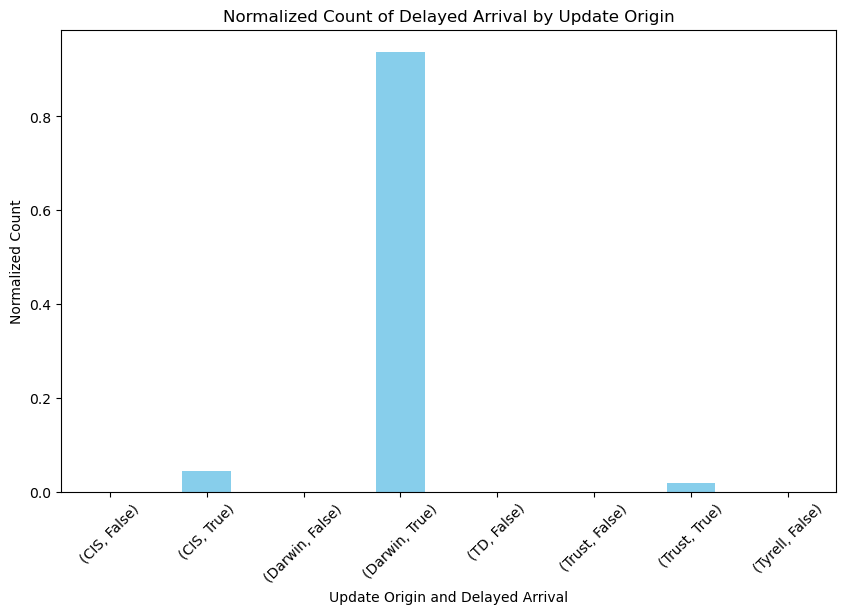

In [20]:
group1 = df.groupby(['update_origin', 'is_delayed_arrival'])['is_delayed_arrival'].sum()

# Calculate the total sum of values in the series
total_sum = group1.sum()

# Normalize the series by dividing each value by the total sum
normalized_group1 = group1 / total_sum

# Create a bar chart from the normalized series
plt.figure(figsize=(10, 6))
normalized_group1.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Update Origin and Delayed Arrival')
plt.ylabel('Normalized Count')
plt.title('Normalized Count of Delayed Arrival by Update Origin')

# Show the plot
plt.xticks(rotation=45)
plt.show()

In [21]:
df['is_delayed_arrival'].value_counts()

False    13452
True       162
Name: is_delayed_arrival, dtype: int64

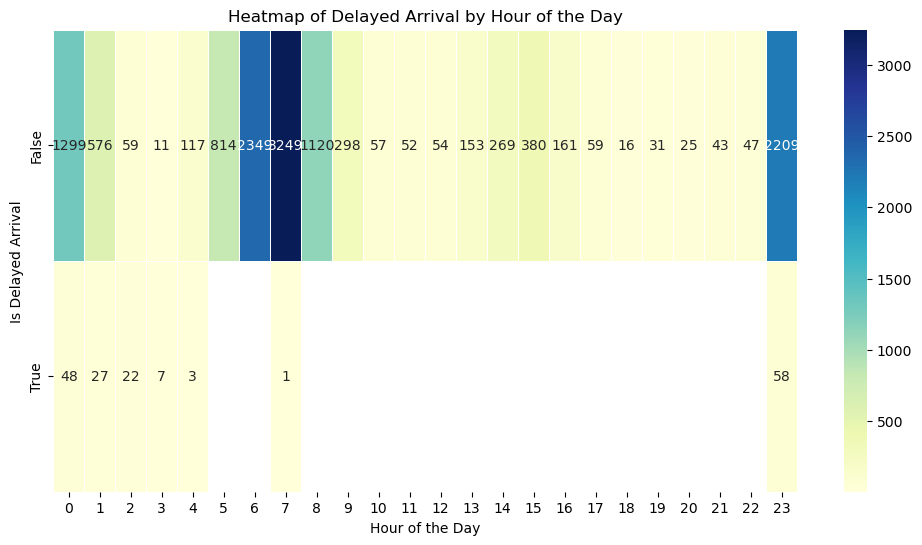

In [22]:
df['hour'] = df['working_time_departure'].apply(lambda x: x.hour)

# Group the DataFrame by 'service_start_date', 'is_delayed_arrival', and 'hour', and count the instances
heatmap_data = df.groupby(['service_start_date', 'is_delayed_departure', 'hour']).size().reset_index(name='Count')

# Create the heatmap using Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data.pivot_table(index='is_delayed_departure', columns='hour', values='Count', aggfunc='sum'),
    cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5
)

# Set labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Is Delayed Arrival')
plt.title('Heatmap of Delayed Arrival by Hour of the Day')

# Show the plot
plt.show()

In [23]:
clean_df['service_start_date'].value_counts()

2023-08-17    11646
2023-08-18     1865
2023-08-16      103
Name: service_start_date, dtype: int64

In [49]:
delayed_df = clean_df[clean_df['is_delayed_arrival'] == True]

delayed_df = delayed_df.groupby(['service_start_date', 'is_delayed_arrival'])['is_delayed_arrival'].sum()
delayed_df

service_start_date  is_delayed_arrival
2023-08-16          True                  10
2023-08-17          True                  97
2023-08-18          True                  55
Name: is_delayed_arrival, dtype: int64

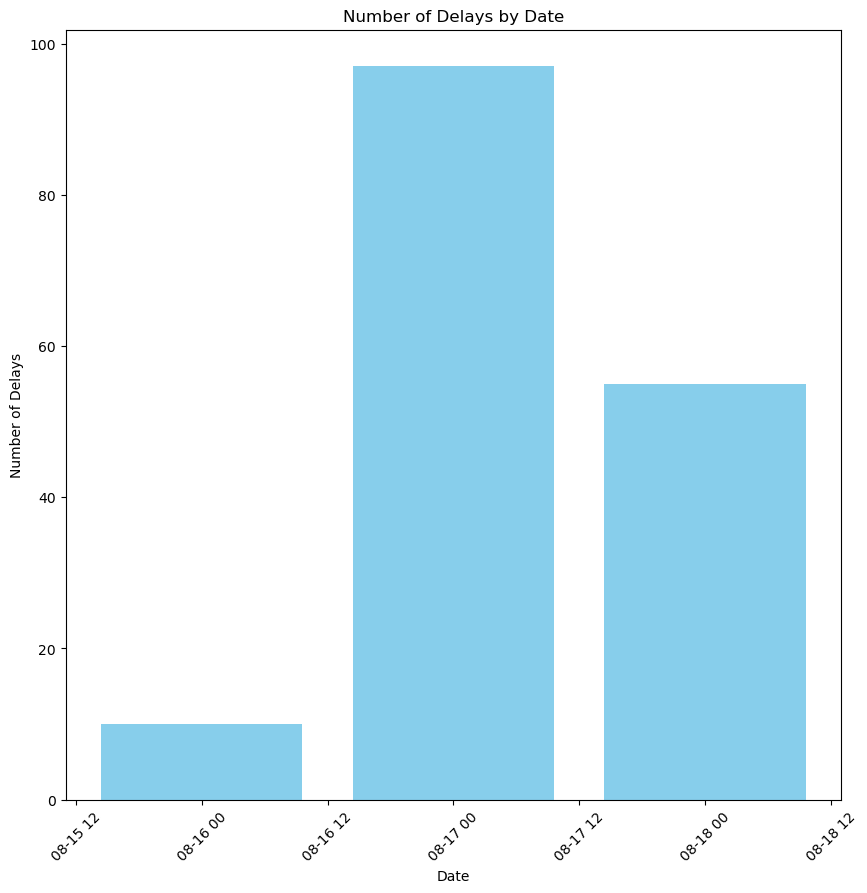

In [63]:
plt.figure(figsize=(10,10))
x = delayed_df.index.get_level_values('service_start_date')
y = delayed_df.values

# Create the bar plot
plt.bar(x, y, color='skyblue')

plt.xlabel('Date')
plt.ylabel('Number of Delays')
plt.title('Number of Delays by Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()